# 💠EDA2💠

In [1]:
import pandas as pd
import ppscore as pps
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler

## 💠Exploratory data analysis (EDA)

In [2]:
data=pd.read_csv('adult_with_headers.csv')
print('💠Shape of data ',data.shape)
data.head()

💠Shape of data  (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [4]:
print('Number of duplicate records ',data.duplicated().sum())
data=data.drop_duplicates()
print('Number of duplicate records ',data.duplicated().sum())

Number of duplicate records  24
Number of duplicate records  0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


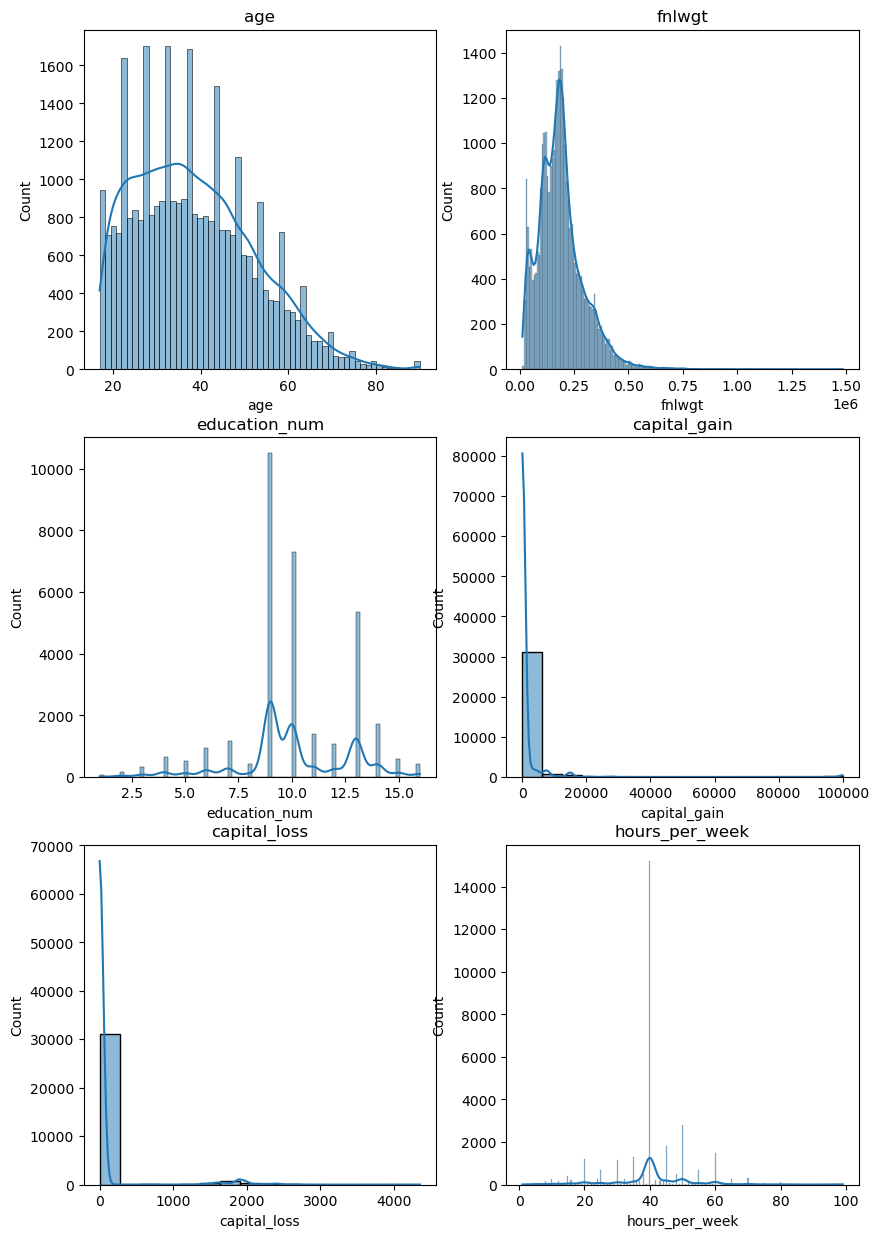

In [6]:
Num_columns=[x for x in data.columns if data[x].dtype=='int64']
print(Num_columns)

plt.figure(figsize=(10,15))

for x,y in enumerate(Num_columns):
    plt.subplot(3,2,x+1)
    sns.histplot(data[y],kde=True)
    plt.title(y)
plt.show()

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


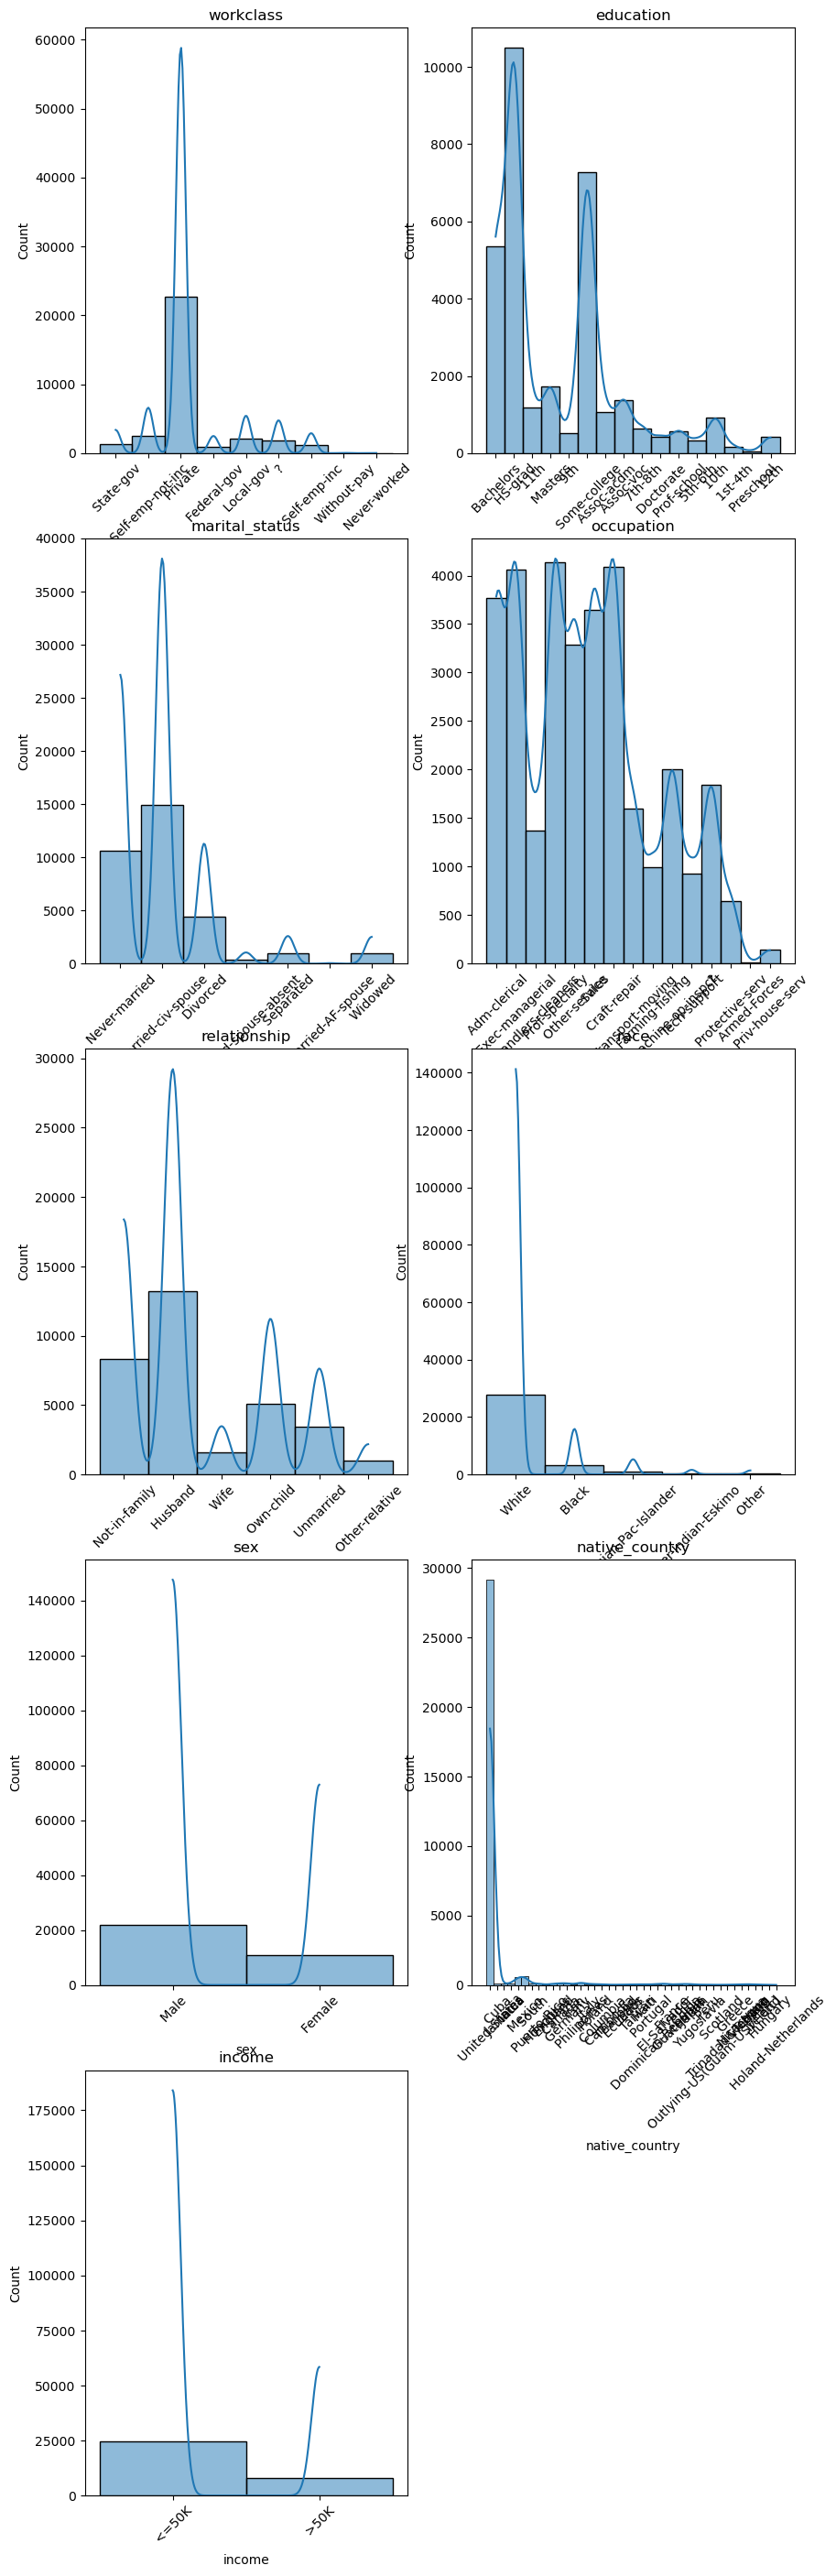

In [7]:
Cat_columns=[x for x in data.columns if data[x].dtype=='object']
print(Cat_columns)

plt.figure(figsize=(10,35))

for x,y in enumerate(Cat_columns):
    plt.subplot(5,2,x+1)
    sns.histplot(data[y],kde=True)
    plt.xticks(rotation=45)
    plt.title(y)
plt.show()

In [8]:
for x,y in enumerate(Cat_columns):
    print(f'*******{y.upper()}*******')
    print(data[y].value_counts())
    print('______________________________')

*******WORKCLASS*******
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
______________________________
*******EDUCATION*******
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
______________________________
*******MARITAL_STATUS*******
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      41

In [9]:
# By observing the data it is found that there are null values in the form of [' ?'],replacing them by None

data=data.replace(' ?',None)

In [10]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [11]:
before=data.shape

In [12]:
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)           #Majority of data is 'Private'
data['native_country'].fillna(data['native_country'].mode()[0],inplace=True) #Majority of data is 'United-States'
data=data.dropna()                                                           #Occupation shows high variation, dropping NULL

print('Shape of data before NULL value treatment ',before)
print('Shape of data after NULL value treatment ',data.shape)

Shape of data before NULL value treatment  (32537, 15)
Shape of data after NULL value treatment  (30694, 15)


In [13]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

###  🚩Note: Applying Log-transformation on 'fnlwgt' column.
1.The column is most skewed among all the columns.

2.For log-transformation it is necessary to have values greater than zero 

<Axes: xlabel='fnlwgt', ylabel='Count'>

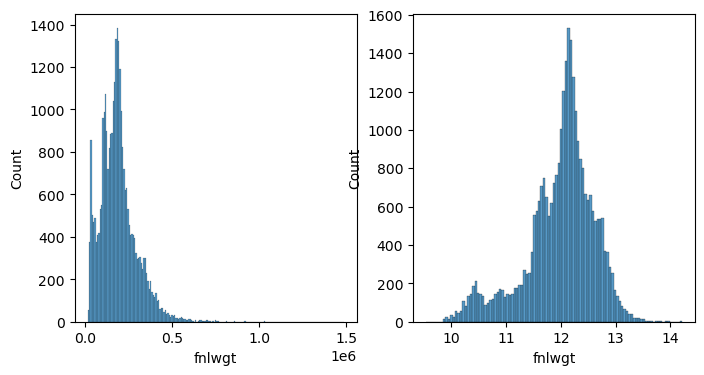

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data['fnlwgt'])

data['fnlwgt']=data['fnlwgt'].apply(lambda x: np.log(x))

plt.subplot(1,2,2)
sns.histplot(data['fnlwgt'])

## 💠Isolation Forest algorithm: Identify and remove outliers

In [15]:
Iso_train=data[['age','fnlwgt','hours_per_week']]

Iso_forest_model=IsolationForest(n_estimators=150,random_state=42)
Iso_forest_model.fit(Iso_train)

Outlier_pred=Iso_forest_model.predict(Iso_train)
pd.value_counts(Outlier_pred)

 1    24419
-1     6275
dtype: int64

In [16]:
Iso_train['OL']=Outlier_pred
Iso_train.head()

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_21804\1443493184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iso_train['OL']=Outlier_pred


,age,fnlwgt,hours_per_week,OL
0,39,11.258240,40,1
1,50,11.330336,13,-1
2,38,12.281393,40,1
3,53,12.366153,40,1
4,28,12.732011,40,1


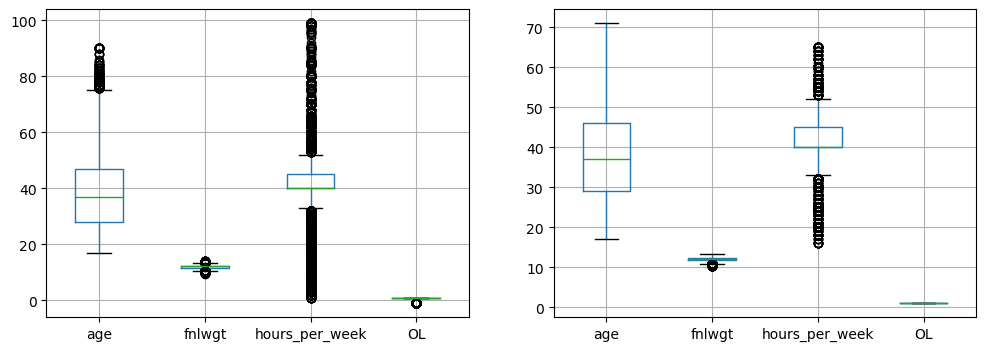

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
Iso_train.boxplot()

plt.subplot(1,2,2)
Iso_train[Iso_train['OL']==1].boxplot()

plt.show()

In [18]:
data['OL']=Outlier_pred
data=data[data['OL']==1]
data=data.drop('OL',axis=1)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,12.558777,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [19]:
data['income']=data['income'].replace([' <=50K',' >50K'],[0,1])
data['income'].value_counts()

0    18079
1     6340
Name: income, dtype: int64

## 💠PPS (Predictive Power Score)  & Correlation Matrix.

It is found that PPS score for all the features is 0 which represents no-predective power.

Where as Correlation matrix also shows a week relation between target and features



In [20]:
mat=pps.matrix(data)

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\s

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\s

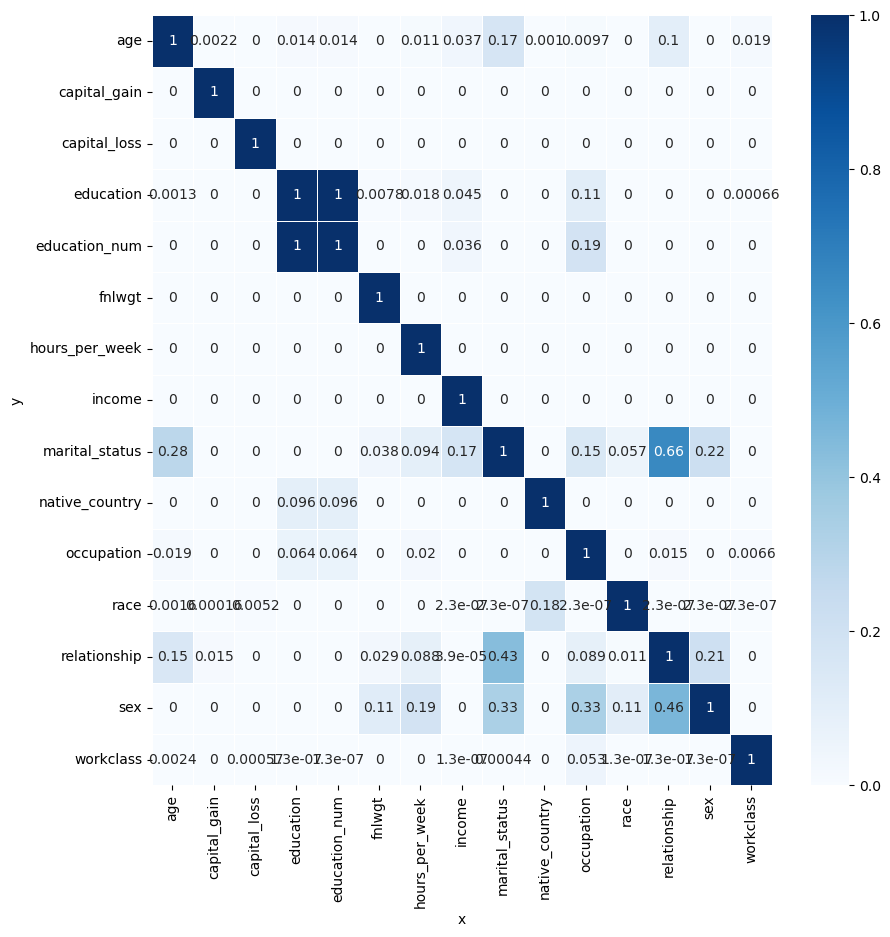

In [21]:
mat_pps=mat[['x','y','ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize=(10,10))
sns.heatmap(mat_pps, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_21804\2776951357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="Blues", linewidths=0.5, annot=True)


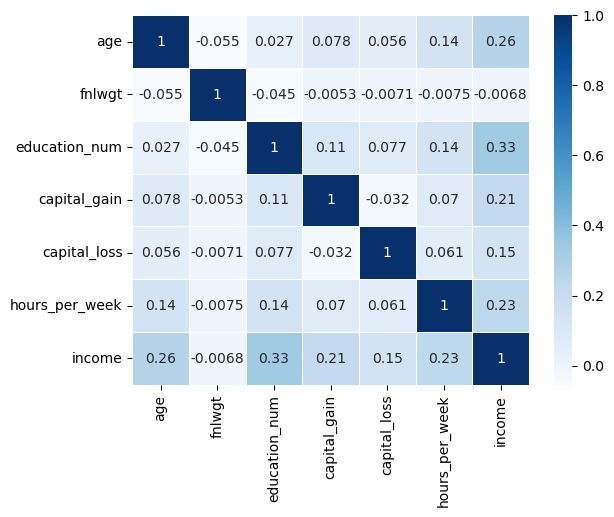

In [22]:
sns.heatmap(data.corr(), cmap="Blues", linewidths=0.5, annot=True)
plt.show()

## 💠Encoding and scaling the features:  ColumnTransformer

In [24]:
X=data.drop(['income','education','native_country'],axis=1)  # Income: Dropped as Target column
                                                             # education: Dropped as education_num-Ordinally encoded same column
                                                             # native_country: Highly imbalanced 



Col_transformer=ColumnTransformer(
transformers=[('OHE',OneHotEncoder(sparse=False,drop='first'),['workclass','marital_status','occupation','relationship','race','sex']),
              ('STD_scale',StandardScaler(),['age','fnlwgt','hours_per_week']),
              ('MinMax_scale',MinMaxScaler(),['capital_gain','capital_loss'])
             ],
remainder='passthrough'
)

X=Col_transformer.fit_transform(X)    
X.shape

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(24419, 41)

## 💠Discussion

▣ One Hot Encoding : Used for nominal categorical data to convert it into a numeric format, nominal data do not have any 
inter-relation. The only problem is it increases dimensionality, multi-collinearity in features.

▣ Ordinal Encoding: Used for ordinal categorical data to convert it into a numeric format.
Can introduce problem in distance based algorithm like KNN.

▣ Label Encoding: Must be used with the target variable and not with any feature ordinal variable.

▣ Standard Scaling: Makes use of standardization technique.
Standardization is used for feature scaling when it showes the Gaussian distribution.It is used to ensure the data to have zero mean and unit standard deviation.It is also used to maintain consistancy of data when data comes from different populations.

▣ Min-Max Scaling: Makes use of normalization technique.
Normalization is a technique use to scale down the data when the data distribution is not in Gaussian distribution,which scale the data in range of 0 to 1 OR -1 to 1 which ultimately reduces the bias and processing time specially in algorithms like ANN, Multi-Linear regression.
